In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import argparse
from create_reference_from_tsv_and_pepxml import ReferenceWriter
from sensitivity_calculator import SensitivityAndSpecificity
from create_PSM_df import PSM_FDR

In [2]:
# Files
uniprot_nr_species_tsv_with_wrong_error = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_new_reduced.tsv"

reference_tsv_with_kleiner_db = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_db/Run1_U1_2000ng.t.xml_new_reduced.tsv"
reference_tsv_with_kleiner_db_sens = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_db/Run1_U1_2000ng.t.xml_reduced.tsv_0.05_sensitivity"


kleiner_reference_with_aradiopsis = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_reference_aradiopsis/Run1_U1_2000ng_kleiner_aradiopsis.t.xml_new_reduced.tsv"
kleiner_reference_with_aradiopsis_sens = "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_reference_aradiopsis/Run1_U1_2000ng_kleiner_aradiopsis.t.xml_reduced.tsv_0.05_sensitivity"



uniprot_reanalysis = {'species':"/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/species/Run1_U1_2000ng_uniprot_species.t.xml_new_reduced.tsv",
                      'species_nr': "/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/species_nr/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv",
                      "species_species": "/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/species_species/Run1_U1_2000ng_uniprot_species_species.t.xml_reduced.tsv",
                      'genus_nr': "/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/genus_nr/Run1_U1_2000ng_uniprot_genus_nr.t.xml_reduced.tsv"
                     }
    

uniprot_nr_reduced_tsv = {
    'subspecies': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_subspecies_nr.t.xml_new_reduced.tsv",
    'species': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_new_reduced.tsv",
    'genus': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus_nr.t.xml_new_reduced.tsv",
    'family': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_family_nr.t.xml_new_reduced.tsv",
}
    
uniprot_reduced_tsv = {
    'subspecies': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_subspecies.t.xml_new_reduced.tsv",
    'species': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species.t.xml_new_reduced.tsv",
    'genus':"/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus.t.xml_new_reduced.tsv"
}

uniprot_species_reduced_tsv =  {
    'subspecies': "",
    'species': "/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/species_species/Run1_U1_2000ng_uniprot_species_species.t.xml_new_reduced.tsv",
    'genus':  "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus_species.t.xml_new_reduced.tsv"
}

ncbi_reduced_tsv= {
    'subspecies': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_subspecies.t.xml_new_reduced.tsv",
    'species': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_species.t.xml_new_reduced.tsv",
    'genus': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_genus.t.xml_new_reduced.tsv"
}

ncbi_species_reduced_tsv = {
    'species': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_species_species.t.xml_new_reduced.tsv",
    'genus': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_genus_species.t.xml_new_reduced.tsv"
}
swissprot_reduced_tsv = {
    'species': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_species.t.xml_new_reduced.tsv",
    'genus': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_genus.t.xml_new_reduced.tsv",
    'family': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_family.t.xml_new_reduced.tsv",
    'order': "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_order.t.xml_new_reduced.tsv"
}


fdr = 0.05
dict_databases_to_size_and_result_file={'reference': (123088, f"{reference_tsv_with_kleiner_db}_{fdr}_sensitivity_new"),
                                        "reference_Arabidopsis_thaliana": (138980, f"{kleiner_reference_with_aradiopsis}_{fdr}_sensitivity_new"),
                                        
                                        'ncbi_subspecies': (300000, f"{ncbi_reduced_tsv['subspecies']}_{fdr}_sensitivity_new"),
                                        'ncbi_species': (8702135, f"{ncbi_reduced_tsv['species']}_{fdr}_sensitivity_new"),
                                        "ncbi_genus":(27804893, f"{ncbi_reduced_tsv['genus']}_{fdr}_sensitivity_new"),
                                        
                                        "uniprot_subspecies": (4683371, f"{uniprot_reduced_tsv['subspecies']}_{fdr}_sensitivity_new"),
                                        "uniprot_species": (4683371, f"{uniprot_reduced_tsv['species']}_{fdr}_sensitivity_new"),
                                        "uniprot_species_species": (2093157, f"{uniprot_species_reduced_tsv['species']}_{fdr}_sensitivity_new"),
                                        "uniprot_subspecies_nr": (200000, f"{uniprot_nr_reduced_tsv['subspecies']}_{fdr}_sensitivity_new"),
                                        "uniprot_species_nr": (2991727, f"{uniprot_nr_reduced_tsv['species']}_{fdr}_sensitivity_new"),
                                        "uniprot_genus": (18352148,  f"{uniprot_reduced_tsv['genus']}_{fdr}_sensitivity_new"),
                                        "uniprot_genus_species": (13068285,  f"{uniprot_species_reduced_tsv['genus']}_{fdr}_sensitivity_new"),
                                        "uniprot_genus_nr": (13210287,  f"{uniprot_nr_reduced_tsv['genus']}_{fdr}_sensitivity_new"),
                                        "uniprot_family_nr": (22509624, f"{uniprot_nr_reduced_tsv['family']}_{fdr}_sensitivity_new"),
                                        
                                        "swissprot_species": (58505, f"{swissprot_reduced_tsv['species']}_{fdr}_sensitivity_new"),
                                        "swissprot_genus": (88164, f"{swissprot_reduced_tsv['genus']}_{fdr}_sensitivity_new" ),
                                        "swissprot_family": (124044, f"{swissprot_reduced_tsv['family']}_{fdr}_sensitivity_new"),
                                        "swissprot_order": (181725, f"{swissprot_reduced_tsv['order']}_{fdr}_sensitivity_new")
                                       }
uniprot_dict =dict(filter(lambda item: item[0] in ['uniprot_subspecies', 'uniprot_species', 'uniprot_genus'], dict_databases_to_size_and_result_file.items()))
uniprot_nr_dict =dict(filter(lambda item: '_nr' in item[0], dict_databases_to_size_and_result_file.items()))
uniprot_species_dict=dict(filter(lambda item: item[0] in ['uniprot_species_species', 'uniprot_genus_species'], dict_databases_to_size_and_result_file.items()))
ncbi_dict =dict(filter(lambda item: 'ncbi' in item[0], dict_databases_to_size_and_result_file.items()))
swissprot_dict=dict(filter(lambda item: 'swiss' in item[0], dict_databases_to_size_and_result_file.items()))

In [ ]:
# now all reduced dataframes without charge one spectra (_new_reduced)
uniprot_reduced_tsv_species_nr_new_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['species'],['Protein', 'Hyperscore', 'decoy', 'taxID'], remove_one_charged_spectra=True)
print('number spectra of new reduced df: ',len(uniprot_reduced_tsv_species_nr_new_df))
uniprot_reduced_tsv_species_nr_new_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['species'],['Protein', 'Hyperscore', 'decoy', 'taxID'], remove_one_charged_spectra=False)
print('number spectra of new reduced df (removed one charge spectra): ',len(uniprot_reduced_tsv_species_nr_new_df))
uniprot_reduced_tsv_species_nr_old_df = ReferenceWriter.read_csv_with_generic_function( "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv",['Protein', 'Hyperscore', 'decoy', 'taxID'], remove_one_charged_spectra=False)
print('number spectra of old reduced df (with one charge spectra): ',len(uniprot_reduced_tsv_species_nr_old_df))
uniprot_reduced_tsv_species_nr_old_df = ReferenceWriter.read_csv_with_generic_function( "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv",
                                                                                       ['Protein', 'Hyperscore', 'decoy', 'taxID'], remove_one_charged_spectra=True)
print('number spectra of old reduced df (removed one charge spectra): ', len(uniprot_reduced_tsv_species_nr_old_df))
# check if same df, also new analysis old analysis
# a = pd.merge(uniprot_reduced_tsv_species_nr_new_df[['Title', 'Peptide']], uniprot_reduced_tsv_species_nr_old_df[['Title', 'Peptide']], how="outer", on='Title')

In [ ]:
# Test for differences old and new analysis
excluded_spectra = set(a[a.Peptide_x.isna()]['Title']) # 46701
print(len(set(a[a.Peptide_y.isna()]['Title']))) # 0
excluded_spectra_with_number_at_last_pos = set([spectrum for spectrum in a[a.Peptide_x.isna()]['Title'] if spectrum.split('.')[-1] != '' ])
included_spectra = uniprot_reduced_tsv_species_nr_new_df['Title']
included_spectra_without_number_at_last_pos = set([spectrum for spectrum in included_spectra if spectrum.split('.')[-1] == '' ])
print(included_spectra_without_number_at_last_pos)
excluded_spectra_without_number_at_last_pos = set([spectrum for spectrum in excluded_spectra if spectrum.split('.')[-1] == '' ])
print(len(excluded_spectra))
print(a[a.Peptide_y == 'VGDYTVAIGNPFGLGETVTSGIVSALGR']) # Spectrum Run1_U1_2000ng.151046.151046. und Run1_U1_2000ng.151255.151255. not passed quality control new analysis
uniprot_reduced_tsv_genus_nr_new_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['genus'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
intersect = set(uniprot_reduced_tsv_genus_nr_new_df['Title']).intersection(excluded_spectra)
print(sorted(list(excluded_spectra_with_number_at_last_pos)))
print(sorted(list(intersect)))
ncbi_reduced_tsv_subspecies_old_df = ReferenceWriter.read_csv_with_generic_function( ncbi_reduced_tsv['subspecies'], ['Protein', 'Hyperscore', 'decoy', 'taxID'])
print(len(ncbi_reduced_tsv_subspecies_old_df))
ncbi_reduced_tsv_subspecies_new = remove_spectra_of_charge_one_from_reduced_tsv(ncbi_reduced_tsv_subspecies_old_df)
print(len(ncbi_reduced_tsv_subspecies_new))

In [3]:
def get_all_rows_without_charge1(title_col):
    return [title.split('.')[-1] != '' for title in title_col]

def remove_spectra_of_charge_one_from_reduced_tsv(reduced_tsv):
    return reduced_tsv[get_all_rows_without_charge1(reduced_tsv.Title)]

def read_all_results_into_dict(file):
    result_dict= {}
    with open(file, 'r') as inp:
        firstline=inp.readline()
        db_names = [name.strip() for name in firstline.strip().split('\t')[1:]]
        for db in db_names:
            result_dict[db] = {}
        for line in inp.readlines():
            result_name = line.split('\t')[0]
            result_fields = [name.strip() for name in line.split('\t')[1:]]
            for i, db in enumerate(db_names):
                result_dict[db][result_name]=result_fields[i]
    return result_dict

def read_analysis_results_into_dict(file):
    result_dict= {}
    with open(file, 'r') as inp:
        for line in inp.readlines():
            result_dict[line.split('\t')[0]] = line.split('\t')[1].strip()
   #print(result_dict)
    return result_dict

def read_TP(file):
    TP = int(read_analysis_results_into_dict(file)['TP:'])
    return TP

def read_TN(file):
    TN = int(read_analysis_results_into_dict(file)['TN:'])
    return TN

def read_FP(file):
    TP = int(read_analysis_results_into_dict(file)['FP:'])
    return TP

def read_FN(file):
    TN = int(read_analysis_results_into_dict(file)['FN:'])
    return TN

def read_sensitivity(file):
    sen = float(read_analysis_results_into_dict(file)['sensitivity:'])
    return sen
 
def read_specificity(file):
    spe = float(read_analysis_results_into_dict(file)['specificity:'])
    return spe

def read_last_score(file):
    last_score = read_analysis_results_into_dict(file)['Hyperscore of last item in FDR boundaries:']
    return last_score

In [4]:
def get_score_results(filtered_dict):   
    db_size = []
    score_border = []
    result_dict = {}
    for file_name, db_size_file_tuple in filtered_dict.items():
        result_dict[file_name] = {'db_size': db_size_file_tuple[0]/100000, 'score_border': read_last_score(db_size_file_tuple[1])}

    for k, v in result_dict.items():
        db_size.append(v['db_size'])
        score_border.append(v['score_border'])
    return result_dict, db_size, score_border

def get_specificity_results(filtered_dict):   
    db_size = []
    score_border = []
    result_dict = {}
    for file_name, db_size_file_tuple in filtered_dict.items():
        result_dict[file_name] = {'db_size': db_size_file_tuple[0]/100000, 'specificity': read_specificity(db_size_file_tuple[1])}
    for k, v in result_dict.items():
        db_size.append(v['db_size'])
        score_border.append(v['specificity'])
    return result_dict, db_size, score_border

In [5]:
def get_decoy_rows_from_decoy_column(decoy_column):
    return [True if d=={True} else False for d in decoy_column]

def get_tax_rows(tax_column, taxid):
    return [True if tax_set == {taxid} else False for tax_set in tax_column]

def get_decoy_rows_from_protein_column(protein_column):
    return [True if 'REVERSED' in p else False for p in protein_column]


def get_hit_rows(protein_column):
    return [False if 'REVERSED' in p else True for p in protein_column]

def get_decoy_rows2(decoy_column):
    return [True if d_set in [{True, False}, {True}] else False for d_set in decoy_column]

def get_hit_rows2(decoy_column):
    return [True if d_set in  [{True, False}, {False}] else False for d_set in decoy_column]

In [6]:
def read_result_df(f):
    df =  ReferenceWriter.read_csv_with_generic_function(f,['Hyperscore', 'taxID', 'decoy'])
    return df[['Title', 'Peptide', 'Hyperscore', 'taxID', 'decoy']]
def get_psm_and_df_in_fdr(file, fdr):
    reduced_df = ReferenceWriter.read_csv_with_generic_function(file,['Protein', 'Hyperscore', 'decoy', 'taxID'], remove_one_charged_spectra=False)
    fdr_pos_result, number_psm_result, number_decoy_result, double_spectra_result, score_last_item_result =PSM_FDR.determine_FDR_position(reduced_df, fdr)
    return number_psm_result, reduced_df[0:fdr_pos_result]

In [7]:
# Histogramm
def create_df_for_df_with_sep_decoy(df_reduced_tsv):
    """
    decoy column values of reduced_tsv file changed to 'PSM' for  {False} and 'DECOY' for {TRUE}
    {True, False} values doubled, one as 'PSM' one as 'DECOY'
    :return:  Title(=spectrum ID) | Protein set {acc1, acc2} | Hyperscore (float) | decoy (PSM or DECOY)
    """
    def get_true_false(decoy_column):
        l = [True if decoy == {True, False} else False for decoy in decoy_column]
        return l
    # reduce df to columns 'Title', 'Protein', 'Hyperscore', 'decoy'
    df_reduced_tsv = df_reduced_tsv[['Title', 'Protein', 'Hyperscore', 'decoy']]
    # df only with rows with value {True, False} in column "decoy"
    df_true_false = df_reduced_tsv[get_true_false(df_reduced_tsv.decoy)]
    # df only with rows with value {True, False} in column "decoy"  copyied
    df_true = df_true_false.copy(deep=True)
    # df value {True, False} in column "decoy" changed to {True}
    df_true.decoy=[{True} for v in df_true.decoy]
    # copied original df with columns 'Title', 'Protein', 'Hyperscore', 'decoy'
    df_with_sep_decoy= df_reduced_tsv.copy(deep=True)
    # decoy column value {False, True} changed to False
    df_with_sep_decoy.decoy = [{False} if v == {False, True} else v for v in df_with_sep_decoy.decoy ]
    # df_true rows appended, so decoy entries with {False True} doubled, one with {true}, once with {False}}
    df_with_sep_decoy = df_with_sep_decoy.append(df_true, ignore_index=True)
    # replace decoy value {True} by DECOY {False} by 'PSM'
    df_with_sep_decoy.decoy=['DECOY' if v == {True} else 'PSM' for v in df_with_sep_decoy.decoy]
    return df_with_sep_decoy

def create_all_level_df_for_histogram_per_db(df_reduced_tsv_list, db_level):
    df_list = []
    for i, df_reduced_tsv in enumerate(df_reduced_tsv_list):
        df_level = create_df_for_df_with_sep_decoy(df_reduced_tsv)
        df_level['level'] = db_level[i]
        df_list.append(df_level)      
    df_all_level = pd.concat(df_list)
    return df_all_level

def get_all_fdr_borders_per_db(db_dict, db_names):
    border_list = []
    for name in (db_names):
        fdr_border_level = float(read_last_score(db_dict[name][1]))
        border_list.append(fdr_border_level)
    return border_list
            
def create_histograms_in_columns_per_db(df_all_level, border_list, output, title):
    """
    multiple histogramms in one row
    """
    sns.set_style("whitegrid", {'axes.grid' : False})
    g1 = sns.displot(data=df_all_level, 
                     col='level', 
                     x="Hyperscore", 
                     hue="decoy", 
                     binwidth=1.5, 
                     palette=['lightblue', 'red'], 
                     legend=False)
    #kde=True : curve insert above hist
    axes_subplots = g1.fig.axes
    for i, fdr_border in enumerate(border_list):
        subplot_axe = axes_subplots[i]
        subplot_axe.axvline(fdr_border, linewidth=2, color='black', label='FDR')
        y_min, y_max = subplot_axe.get_ylim()
        subplot_axe.text(fdr_border+1, y_max-(y_max/10), str(fdr_border), va='bottom')
    plt.legend(title='', loc='upper right', labels=['0.05 FDR','DECOY', 'PSM'])
    # p.fig.suptitle
    plt.suptitle(title,y=1.05)
    plt.savefig(output, format='svg')

def create_histogramm(df_with_sep_decoy, output, fdr_border):
    """
    single histogramm
    """
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.figure(figsize=(20,6))
    sns.displot(df_with_sep_decoy, 
                x="Hyperscore", 
                hue="decoy", 
                binwidth=1.5, 
                palette=['lightblue', 'red'], 
                legend=False,)    
    plt.axvline(fdr_border, linewidth=2, color='black', label='FDR')
    axes = plt.gca()
    y_min, y_max = axes.get_ylim()
    plt.text(fdr_border+1, y_max-(y_max/10), str(fdr_border), va='bottom')
    plt.legend(title='', loc='upper right', labels=['0.05 FDR','DECOY', 'PSM'])
    plt.suptitle('Reference Database')
    plt.savefig(output, format='svg')
    return plt
    #plt.close()

In [8]:
# create df sensitivity analysis and save
def create_sens_dict(file, db, level):
    d = read_analysis_results_into_dict(file)
    d['database'] = db
    d['level'] = level
    return d

d_list = []
for level in ['subspecies', 'species', 'genus', 'family', 'order']:
    try:
        d = create_sens_dict(uniprot_nr_dict[f'uniprot_{level}_nr'][1], 'uniprot_nr', level)
        d_list.append(d)
    except FileNotFoundError:
        pass
    except KeyError:
        pass
    try:
        d = create_sens_dict(uniprot_dict[f'uniprot_{level}'][1], 'uniprot', level)
        d_list.append(d)
    except FileNotFoundError:
        pass
    except KeyError:
        print(level)
        pass
    try:
        d = create_sens_dict(ncbi_dict[f'ncbi_{level}'][1], 'ncbi', level)
        d_list.append(d)
    except FileNotFoundError:
        pass
    except KeyError:
        pass
    try:
        d = create_sens_dict(swissprot_dict[f'swissprot_{level}'][1], 'swissprot', level)
        d_list.append(d)
    except FileNotFoundError:
        pass
    except KeyError:
        pass
ref_list= []
ref_d =create_sens_dict(reference_tsv_with_kleiner_db_sens, 'reference', '-')
ref_list.insert(0, ref_d)
ref_d =create_sens_dict(kleiner_reference_with_aradiopsis_sens, 'reference with aradiopsis seq', '-')
ref_list.append(ref_d)



full_df = pd.DataFrame(d_list)
full_df = full_df.sort_values(by=['database'], ignore_index=True)
full_df = pd.concat([pd.DataFrame(ref_list), full_df],  ignore_index=True)
full_df.columns = [head[0:-1] if head.endswith(':') else head for head in list(full_df.columns) ]
full_df = full_df.rename(columns={'Number of spectra identified in result but not in reference': "nb additional identified spectra", 
                        "Number of spectra identified in result": "nb identified spectra",
                       "Number of PSMs in result": "nb PSMs",
                       "Hyperscore of last item in FDR boundaries": "lowest score in FDR"})
print(full_df.columns)
df = full_df[['database', 'level', 'specificity', 'sensitivity', 'TP', 'FP', 'TN', 'FN', "nb additional identified spectra",
             "nb identified spectra", "nb PSMs", "lowest score in FDR"]]
df.to_csv('/home/jules/Documents/Tax2Proteome/benchmarking/sensitivity_analysis_new.tsv', sep = '\t')
df

family
order
Index(['FDR', 'specificity', 'sensitivity', 'TP', 'FP', 'TN', 'FN',
       'nb additional identified spectra', 'nb identified spectra',
       'Number of spectra identified in reference', 'FDR Position reference',
       'nb PSMs', 'Number of Decoys in result',
       'Number of double identified spectra in result', 'lowest score in FDR',
       'database', 'level'],
      dtype='object')


,database,level,specificity,sensitivity,TP,FP,TN,FN,nb additional identified spectra,nb identified spectra,nb PSMs,lowest score in FDR
0,reference,-,100.0,100.0,41358,0,80848,0,0,43482,41308,20.8
1,reference with aradiopsis seq,-,99.88127187503865,98.36553828272555,40623,96,80761,675,276,43057,40905,21.1
2,ncbi,subspecies,98.80276943814718,76.82999110935494,31110,977,80628,9382,662,34322,32606,22.4
3,ncbi,species,98.56288461063194,85.72694817185769,34818,1163,79763,5797,3139,40681,38647,24.6
4,ncbi,genus,98.32002476013618,76.97402565306575,31146,1357,79418,9317,3560,37416,35546,27.7
5,swissprot,species,98.38423573988489,50.75700981124558,20383,1339,81532,19775,764,23515,22340,20.4
6,swissprot,genus,98.50117721303914,52.31510216241714,21072,1235,81163,19207,730,24075,22872,21.4
7,swissprot,family,98.57311708725798,52.18576526566218,21058,1171,80896,19294,915,24183,22974,22.0
8,swissprot,order,98.44095276465346,50.98214507437483,20530,1277,80632,19739,1125,23918,22723,23.0
9,uniprot,subspecies,98.80276943814718,76.82999110935494,31110,977,80628,9382,662,34322,32606,22.4


In [12]:
# load ref file
kleiner_pep_xml_result = pd.read_csv('/home/jules/Documents/Tax2Proteome/benchmarking/spectra/Run1_U1_2000ng.pep.xml.tsv', sep='\t')
kleiner_pep_xml_result = kleiner_pep_xml_result.rename(columns={'Peptide': 'Peptide_ref'})
kleiner_pep_xml_result_reduced_df = kleiner_pep_xml_result.groupby(["Title", "Ref_Score"], as_index=False).agg(
            {'ProteinAcc': lambda acc: set(acc), 'Peptide_ref': lambda seq: set(seq)})

In [13]:
# load files into df, 2.5GB Ram
#read complete tsv. for 'Protein', 'Hyperscore', 'decoy' use function for reading (get set(int) instead oof strings)
uniprot_reduced_tsv_subspecies_df = ReferenceWriter.read_csv_with_generic_function(uniprot_reduced_tsv['subspecies'],['Hyperscore', 'decoy', 'taxID'])
uniprot_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['species'],[ 'Hyperscore', 'decoy', 'taxID'])
uniprot_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['genus'],['Hyperscore', 'decoy', 'taxID'])
uniprot_reduced_tsv_family_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['family'],['Hyperscore', 'decoy', 'taxID'])

In [14]:
swissprot_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['species'],['Hyperscore', 'decoy', 'taxID'])
swissprot_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['genus'], ['Hyperscore', 'decoy', 'taxID'])
swissprot_reduced_tsv_family_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['family'], ['Hyperscore', 'decoy', 'taxID'])
swissprot_reduced_tsv_order_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['order'], ['Hyperscore', 'decoy', 'taxID'])


In [ ]:
ncbi_reduced_tsv_subspecies_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv['subspecies'],['Hyperscore', 'decoy', 'taxID'])
print('subspecies df loaded')
ncbi_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv['species'],['Hyperscore', 'decoy', 'taxID'])
print('species df loaded')
ncbi_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv['genus'], ['Hyperscore', 'decoy', 'taxID'])
print('genus df loaded')

subspecies df loaded
species df loaded


                            Title                   Protein  Hyperscore decoy
0  Run1_U1_2000ng.150015.150015.2  {LT2_P0A1R6, K12_P0ACF0}       126.4   PSM
1  Run1_U1_2000ng.125600.125600.2              {Cup_Q1LLQ4}       125.3   PSM
2    Run1_U1_2000ng.74833.74833.2              {Cup_Q1LQS4}       121.9   PSM
3  Run1_U1_2000ng.149614.149614.2  {LT2_P0A1R6, K12_P0ACF0}       116.8   PSM
4  Run1_U1_2000ng.112688.112688.2              {Cup_Q1LI33}       116.5   PSM


<Figure size 1440x432 with 0 Axes>

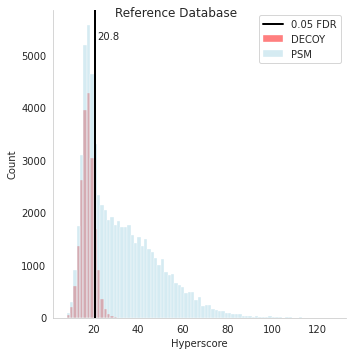

In [78]:
# create single histogramm for reference db
kleiner_ref_db_df = ReferenceWriter.read_csv_with_generic_function("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_kleiner_db/Run1_U1_2000ng.t.xml_reduced.tsv",['Protein', 'Hyperscore', 'decoy', 'taxID'])
df_with_sep_decoy_ref = create_df_for_df_with_sep_decoy(kleiner_ref_db_df)
create_histogramm(df_with_sep_decoy_ref, '/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_reference.svg', 20.8)
print(df_with_sep_decoy_ref.head())

In [15]:
# create df for histogramm, get fdr_borders
df_uniprot = create_all_level_df_for_histogram_per_db([uniprot_reduced_tsv_subspecies_df, uniprot_reduced_tsv_species_df, uniprot_reduced_tsv_genus_df,
                                                       uniprot_reduced_tsv_family_df], ['subspecies', 'species', 'genus', 'family'])
border_list_uniprot = get_all_fdr_borders_per_db(uniprot_nr_dict, [ 'uniprot_species_nr', 'uniprot_genus_nr', 'uniprot_family_nr'])
border_list_uniprot=[float(read_last_score(dict_databases_to_size_and_result_file['uniprot_subspecies'][1]))]+border_list_uniprot

In [11]:
df_ncbi = create_all_level_df_for_histogram_per_db([ncbi_reduced_tsv_subspecies_df, ncbi_reduced_tsv_species_df, ncbi_reduced_tsv_genus_df], ['subspecies','species', 'genus'])
border_list_ncbi = get_all_fdr_borders_per_db(ncbi_dict, ['ncbi_subspecies', 'ncbi_species', 'ncbi_genus'])

In [86]:
df_swissprot = create_all_level_df_for_histogram_per_db([swissprot_reduced_tsv_species_df, swissprot_reduced_tsv_genus_df,
                                                       swissprot_reduced_tsv_family_df, swissprot_reduced_tsv_genus_df], ['species', 'genus', 'family', 'order'])
border_list_swissprot = get_all_fdr_borders_per_db(swissprot_dict, ['swissprot_species', 'swissprot_genus', 'swissprot_family', 'swissprot_order'])

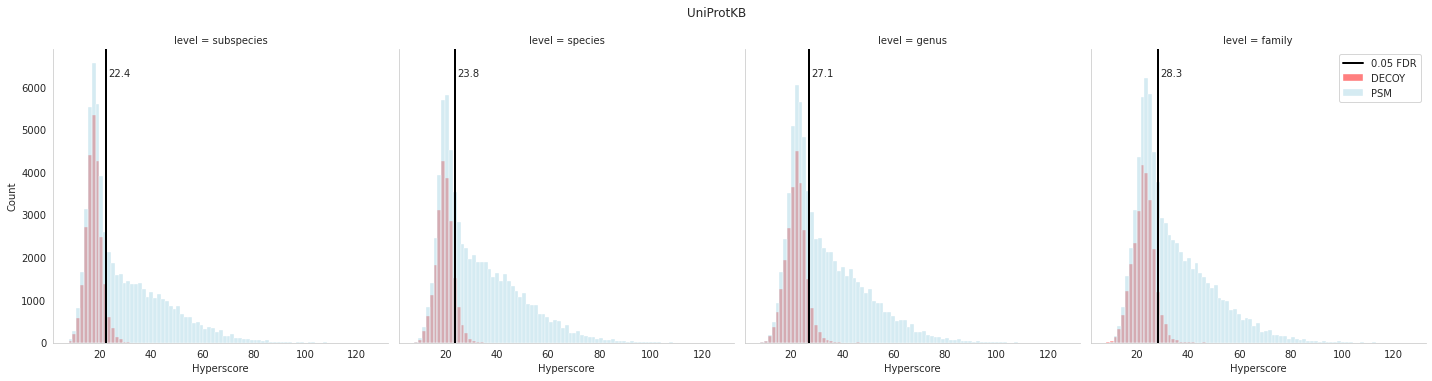

In [16]:
# plot and save histogramm
output = f'/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_uniprot_with_subspecies.svg'
create_histograms_in_columns_per_db(df_uniprot, border_list_uniprot, output, 'UniProtKB')

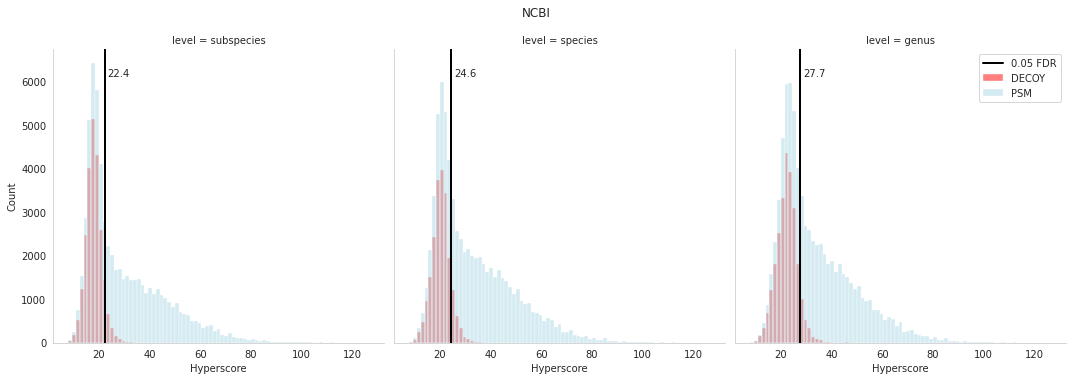

In [12]:
output = f'/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_ncbi_with_subspecies.svg'
create_histograms_in_columns_per_db(df_ncbi, border_list_ncbi, output, 'NCBI')

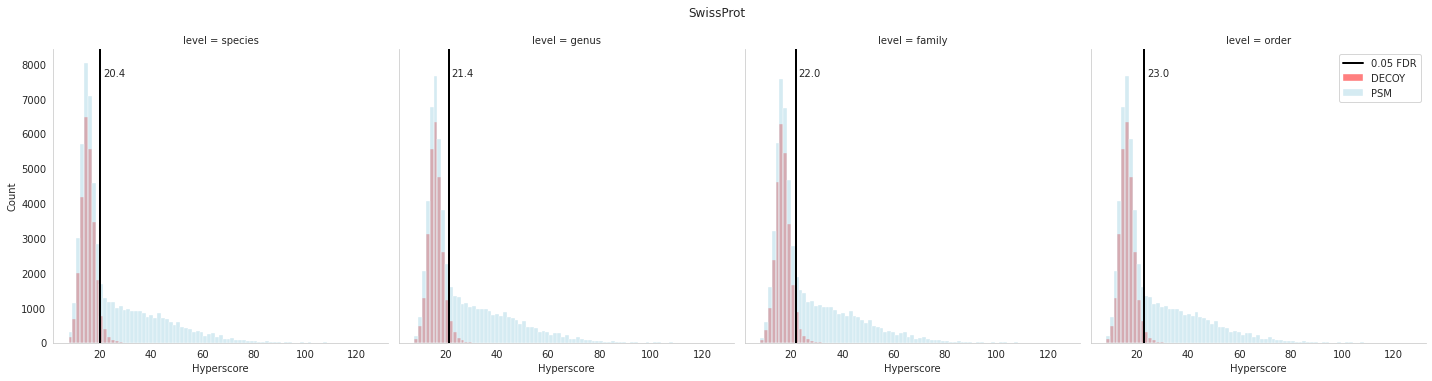

In [87]:
output = f'/home/jules/Documents/Tax2Proteome/benchmarking/plots/histogramms/histogramm_psm_decoy_swissprot.svg'
create_histograms_in_columns_per_db(df_swissprot, border_list_swissprot, output, 'SwissProt')

In [ ]:
# ROC
fdrs = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
files = [f'/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv_{fdr}_sensitivity'
        for fdr in fdrs]

files_ignore_unclassified = [f'/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv_ignore_unclassified_{fdr}_sensitivity' 
                            for fdr in fdrs]
used_files=files_ignore_unclassified
TP_values = [read_TP(file) for file in used_files]
FN_values = [read_FN(file) for file in used_files]
FP_values = [read_FP(file) for file in used_files]
TN_values = [read_TN(file) for file in used_files]
#fpr = fp/(fp+tn)
fpr_values = [FP_values[i]/(FP_values[i]+TN_values[i]) for i in range(len(used_files))]
#tpr = tp/(tp+fn) = sensitivity
tpr_values =  [TP_values[i]/(TP_values[i]+FN_values[i]) for i in range(len(used_files))]
m = max(tpr_values)
maxes = [i for i, j in enumerate(tpr_values) if j == m]
print('tpr max:', [fdrs[i] for i in maxes])
#print(tpr_values)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
#ax.plot(np.linspace(0, 1, 100),
 #        np.linspace(0, 1, 100),
  #       label='baseline',
   #      linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
#plt.legend(fontsize=12);

In [ ]:
uni_spec_in_fdr = get_df_in_fdr(uniprot_reduced_tsv_species_df, 0.1)
# kleiner_pep_xml_result:  Title ProteinAcc  Peptide  Ref_Score
# uni_spec_in_fdr: reduced_df of uniprot species matches in FDR-border: Title Peptide  Hyperscore taxID  decoy 
print('number of identified spectra by Kleiner: ', len(set(kleiner_pep_xml_result['Title'].tolist())))
print('number of identified spectra by Uniprot species: ', len(set(uni_spec_in_fdr['Title'].tolist())))
# Title  Ref_Score  ProteinAcc Peptide_x (set)  Peptide_y(string)  Hyperscore   taxID    decoy
merged_pep_xml_uniprot_df = pd.merge(kleiner_pep_xml_result_reduced_df, uni_spec_in_fdr, how="outer", left_on='Title', right_on="Title")
df_identified_in_uniprot = merged_pep_xml_uniprot_df[merged_pep_xml_uniprot_df['Peptide_ref'].isna()]
df_identified_in_kleiner_ref = merged_pep_xml_uniprot_df[merged_pep_xml_uniprot_df['Peptide'].isna()]
print('number of spectra identified in uniprot species result but not in kleiner: ', len(set(df_identified_in_uniprot['Title'].tolist())))
print('number of spectra identified in kleiner but not in uniprot species result: ', len(set(df_identified_in_kleiner_ref['Title'].tolist())))

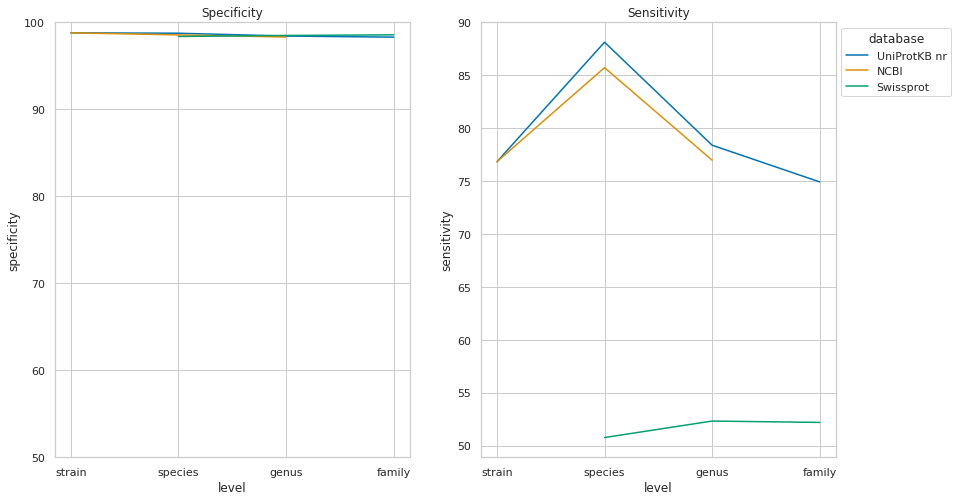

In [12]:
# sensitivity and specificity plot

column_names = ['database', 'level', 'specificity', 'sensitivity']
rows =[['uniprot_nr', 'strain', read_specificity(dict_databases_to_size_and_result_file['uniprot_subspecies'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['uniprot_subspecies'][1])], 
    ['uniprot_nr', 'species', read_specificity(dict_databases_to_size_and_result_file['uniprot_species_nr'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['uniprot_species_nr'][1])], 
       ['uniprot_nr', 'genus', read_specificity(dict_databases_to_size_and_result_file['uniprot_genus_nr'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['uniprot_genus_nr'][1])], 
       ['uniprot_nr', 'family', read_specificity(dict_databases_to_size_and_result_file['uniprot_family_nr'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['uniprot_family_nr'][1])],
       ['ncbi_nr', 'strain', read_specificity(dict_databases_to_size_and_result_file['ncbi_subspecies'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['ncbi_subspecies'][1])],
      ['ncbi_nr', 'species', read_specificity(dict_databases_to_size_and_result_file['ncbi_species'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['ncbi_species'][1])],
       ['ncbi_nr', 'genus', read_specificity(dict_databases_to_size_and_result_file['ncbi_genus'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['ncbi_genus'][1])],
      ['swissprot', 'species', read_specificity(dict_databases_to_size_and_result_file['swissprot_species'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['swissprot_species'][1]) ], 
       ['swissprot', 'genus', read_specificity(dict_databases_to_size_and_result_file['swissprot_genus'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['swissprot_genus'][1]) ], 
       ['swissprot', 'family', read_specificity(dict_databases_to_size_and_result_file['swissprot_family'][1]), 
        read_sensitivity(dict_databases_to_size_and_result_file['swissprot_family'][1]) ]]
df_spe_sens = pd.DataFrame(rows,columns=column_names)
df_spe = df_spe_sens[['database', 'level', 'specificity']]
df_sen = df_spe_sens[['database', 'level', 'sensitivity']]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
sns.lineplot(ax=axes[0], data=df_spe, x="level", y="specificity", hue='database', palette=sns.color_palette("colorblind")[0:3], legend=False)
axes[0].set_title('Specificity')
axes[0].set(ylim=(50, 100))
sns.lineplot(ax=axes[1], data=df_sen, x="level", y="sensitivity", hue='database',  palette=sns.color_palette("colorblind")[0:3], legend=False)
axes[1].set_title('Sensitivity')

plt.legend(title='database', bbox_to_anchor=(1, 1), loc=2, labels=['UniProtKB nr','NCBI', 'Swissprot'])
plt.savefig("/home/jules/Documents/Tax2Proteome/benchmarking/plots/sens_spec.svg", format='svg')

In [ ]:
uni_spec_in_fdr = uni_spec_in_fdr.rename(columns={'Peptide': 'Peptide_uni'})
merged_pep_xml_uniprot_df = pd.merge(kleiner_pep_xml_result_reduced_df, uni_spec_in_fdr, how="outer", on="Title")
a = pd.merge(merged_pep_xml_uniprot_df_er, merged_pep_xml_uniprot_df, how="outer", on='Title')
b = a[a['Peptide_uni'].isna()][['Title', 'Peptide_ref_x', 'Peptide_ref_y', 'Peptide_uni', 'Peptide_er']]
c = b[b['Peptide_er'].notna()]
d = c[c['Peptide_ref_x'].notna()]
# without quality control: 8 specta more identified (equal to kleiner_ref), all other trash

In [ ]:
# database size
db_size_files = ["/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_kleiner_noRH",
       "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_kleiner",
       "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_tanca",
       "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/database_size_tanca_noRH"]
sns.set_style("white") 
#or whitegrid?
#xlabels = ['axes.axisbelow':False]

for i, file in enumerate(db_size_files):
    DatabaseSize = pd.read_csv(file+".txt", sep='\t')
    if 'kleiner' in file:
        title = '29MM'
    elif 'tanca' in file:
        title = '9MM'
    if 'noRH' in file:
        g = sns.catplot(x='level', y='# fasta', hue='database', linestyles=["-", "-", "-", "-"],
            kind="point", palette=['blue','red','orange','purple'], data=DatabaseSize)  
        plt.ylim([0,(50000000)])
    else:    
        g = sns.catplot(x='level', y='size (GB)', hue='database', linestyles=["-", "-", "-","-", "-"],
            kind="point", palette=['blue','dodgerblue','red','orange','purple'], data=DatabaseSize)
        plt.ylim([0,43])
    g.fig.suptitle(title)
    g.savefig(f"/home/jules/Documents/Tax2Proteome/benchmarking/plots/database_size/{Path(file +'.txt').stem}.svg", format='svg')

In [36]:
# database-size vs. PSMs
def get_psm_per_db_from_loaded_df(db, fdr):
    PSM_identified = []
    if db == 'uniprot':
        files = [uniprot_reduced_tsv_subspecies_df, uniprot_reduced_tsv_species_df, uniprot_reduced_tsv_genus_df,
                 uniprot_reduced_tsv_family_df]
    if db == 'ncbi':
        files = [ncbi_reduced_tsv_subspecies_df, ncbi_reduced_tsv_species_df, ncbi_reduced_tsv_genus_df]
    if db == 'swissprot':
        files = [swissprot_reduced_tsv_species_df, swissprot_reduced_tsv_genus_df,
                 swissprot_reduced_tsv_family_df, swissprot_reduced_tsv_order_df]
    for file in files:
        psm, df = get_psm_and_df_in_fdr(file, fdr)
        PSM_identified.append(psm)
    return PSM_identified

def get_psm_per_db_from_sens_analysis(df, db):
    PSM_identified = []
    if db == 'uniprot':
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'uniprot' ].loc[full_df['level'] == 'subspecies']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'uniprot_nr' ].loc[full_df['level'] == 'species']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'uniprot_nr' ].loc[full_df['level'] == 'genus']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'uniprot_nr' ].loc[full_df['level'] == 'family']['nb PSMs']))
        
    if db == 'ncbi':
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'ncbi' ].loc[full_df['level'] == 'subspecies']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'ncbi' ].loc[full_df['level'] == 'species']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'ncbi' ].loc[full_df['level'] == 'genus']['nb PSMs']))
        
    if db == 'swissprot':        
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'swissprot' ].loc[full_df['level'] == 'species']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'swissprot' ].loc[full_df['level'] == 'genus']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'swissprot' ].loc[full_df['level'] == 'family']['nb PSMs']))
        PSM_identified.append(int(full_df.loc[full_df['database'] == 'swissprot' ].loc[full_df['level'] == 'order']['nb PSMs']))
    return PSM_identified

def create_pd_df_for_psm_plot(PSM_identified_uniprot_percentage, PSM_identified_ncbi_percentage, uniprot_database_sizes, ncbi_database_sizes, PSM_identified_swissprot_percentage=None, swissprot_database_sizes=None):
    database = ['UniProtKB' for e in PSM_identified_uniprot_percentage]
    database.extend(['NCBI' for e in PSM_identified_ncbi_percentage])
    if PSM_identified_swissprot_percentage:
        database.extend(['Swissprot' for e in PSM_identified_swissprot_percentage])
    psms = PSM_identified_uniprot_percentage + PSM_identified_ncbi_percentage 
    if PSM_identified_swissprot_percentage:
        psms = psms + PSM_identified_swissprot_percentage
    dataset = ['kleiner' for e in  database]
    level = ['subspecies', 'species', 'genus', 'family', 'subspecies', 'species', 'genus']
    if PSM_identified_swissprot_percentage:
        level = level + ['species', 'genus', 'family', 'order']

    database_size = uniprot_database_sizes + ncbi_database_sizes
    if swissprot_database_sizes:
        database_size = database_size + swissprot_database_sizes
    DatabaseSize = pd.DataFrame(list(zip(database_size, level, psms, database, dataset)), columns =['# fasta (M)', 'level', '% PSMs identified', 'database', 'dataset'])
    return DatabaseSize

In [37]:
# database-size vs. PSMs
number_of_spectra = 164414
number_of_spectra_passing_quality_control = 88279
PSM_identified_uniprot = get_psm_per_db_from_sens_analysis(full_df, 'uniprot')
PSM_identified_ncbi = get_psm_per_db_from_sens_analysis(full_df, 'ncbi')
PSM_identified_swissprot = get_psm_per_db_from_sens_analysis(full_df, 'swissprot')
PSM_identified_ncbi_percentage = [psm/number_of_spectra_passing_quality_control * 100 for psm in PSM_identified_ncbi]
PSM_identified_uniprot_percentage= [psm/number_of_spectra_passing_quality_control * 100 for psm in PSM_identified_uniprot]
PSM_identified_swissprot_percentage= [psm/number_of_spectra_passing_quality_control * 100 for psm in PSM_identified_swissprot]
uniprot_database_sizes = [uniprot_nr_db[0]/1000000 for uniprot_nr_db in uniprot_nr_dict.values()]
ncbi_database_sizes = [ncbi_db[0]/1000000 for ncbi_db in ncbi_dict.values()]
swissprot_database_sizes = [swissprot_db[0]/1000000 for swissprot_db in swissprot_dict.values()]



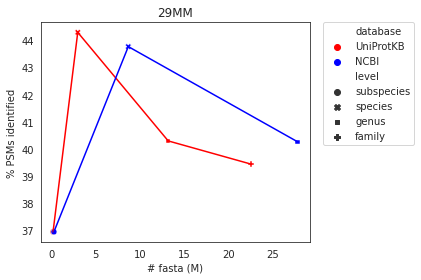

In [38]:
# database-size vs. PSMs Plots
# identified PSMs deutlich abweichend von Bachelor-Analyse
sns.set_style("white") 
def create_fasta_size_vs_identifed_psms_plot(DatabaseSize, output):
    plt.clf()
    if set(DatabaseSize['dataset']) == {'kleiner'}:
        title = '29MM'
        #plt.ylim([0,30])
    elif set(DatabaseSize['dataset']) == {'tanca'}:
        title = '9MM'
        #plt.ylim([50,100])
    g = sns.scatterplot(x='# fasta (M)', y='% PSMs identified', style ='level', hue='database', palette=['red','blue'], linestyles=["-", "-"], data=DatabaseSize) 
    sns.lineplot(x='# fasta (M)', y='% PSMs identified', hue='database', legend=False, palette=['red','blue'], data=DatabaseSize) 
    g.set_title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.savefig(output, format='svg')
    
df_for_plot = create_pd_df_for_psm_plot(PSM_identified_uniprot_percentage, PSM_identified_ncbi_percentage, uniprot_database_sizes, ncbi_database_sizes)
create_fasta_size_vs_identifed_psms_plot(df_for_plot, "/home/jules/Documents/Tax2Proteome/benchmarking/plots/database_size/uni_ncbi_db_psm_vs_db_size.svg")

   # fasta (M)       level  % PSMs identified   database  dataset
0     0.200000  subspecies          36.935171  UniProtKB  kleiner
1     2.991727     species          44.303855  UniProtKB  kleiner
2    13.210287       genus          40.293841  UniProtKB  kleiner
3    22.509624      family          39.441996  UniProtKB  kleiner
4     0.300000  subspecies          36.935171       NCBI  kleiner
5     8.702135     species          43.778249       NCBI  kleiner
6    27.804893       genus          40.265522       NCBI  kleiner


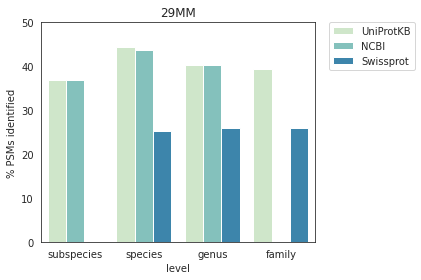

In [39]:
#PSMs 
outputfiles = [
    "/home/jules/Documents/Tax2Proteome/benchmarking/plots/PSM/kleiner_psm_vs_level.svg",
    "/home/jules/Documents/Tax2Proteome/benchmarking/plots/PSM/tanca_psm_vs_level.svg"
]

def create_database_level_vs_identified_plot(df_for_plot, dataset, output):
    
    title=''
    plt.clf()
    if dataset == 'tanca':
        title= '9MM'
        plt.ylim([0,100])
    elif dataset == 'kleiner':
        title= '29MM'
        plt.ylim([0,50])
    #number = len(set(list(PSM['Database level'])))
    g = sns.barplot(x="level", y="% PSMs identified", hue='database', palette=sns.color_palette("GnBu", 3), data=df_for_plot)
    handles, labels = g.get_legend_handles_labels()
    g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #g.get_legend().set_visible(False)
    for tick in g.get_xticklabels():
        tick.set_rotation(0)       
    g.set_title(title)
    plt.tight_layout()
    plt.savefig(output, format='svg')
    
df_for_plot_all_db = create_pd_df_for_psm_plot(PSM_identified_uniprot_percentage, PSM_identified_ncbi_percentage, uniprot_database_sizes, ncbi_database_sizes, PSM_identified_swissprot_percentage, swissprot_database_sizes)
df_for_plot_all_db = df_for_plot_all_db[df_for_plot_all_db.level != 'order']
print(df_for_plot)
create_database_level_vs_identified_plot(df_for_plot_all_db, 'kleiner', outputfiles[0])

In [28]:
def get_decoy_rows_from_decoy_column_from_merged_df(decoy_column):
    result=[]
    for d in decoy_column:
        if type(d) != set:
            result.append(True)
        elif  d=={True}:
            result.append(True)
        else:
            result.append(False)
    return result

In [ ]:
# identified spectra in all levels together: 36,84%, deutlich abweichender Wert von Bachelorarbeit 26%:
l = [uniprot_reduced_tsv_subspecies_df, uniprot_reduced_tsv_species_df, uniprot_reduced_tsv_genus_df, uniprot_reduced_tsv_family_df]
fdr = 0.1
psm, uniprot_reduced_tsv_subspecies_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
psm,uniprot_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
psm,uniprot_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)
psm, uniprot_reduced_tsv_family_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_family_df, fdr)

subspecies_df_in_fdr = uniprot_reduced_tsv_subspecies_df_in_fdr.rename(columns={'decoy': 'decoy_subspecies'})
species_df_in_fdr = uniprot_reduced_tsv_species_df_in_fdr.rename(columns={'decoy': 'decoy_species'})
genus_df_in_fdr = uniprot_reduced_tsv_genus_df_in_fdr.rename(columns={'decoy': 'decoy_genus'})
family_df_in_fdr = uniprot_reduced_tsv_family_df_in_fdr.rename(columns={'decoy': 'decoy_family'})
a = pd.merge(subspecies_df_in_fdr, species_df_in_fdr, how="outer", on='Title')
b = pd.merge(a, genus_df_in_fdr, how="outer", on='Title')
c = pd.merge(b, family_df_in_fdr, how="outer", on='Title')
decoy_subp, decoy_sp, decoy_gen, decoy_fam = get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_subspecies), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_species), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_genus), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_family)
decoy_list= []
for decoy_sub, decoy_s, decoy_ge, decoy_fa in zip(decoy_subp, decoy_sp, decoy_gen, decoy_fam):
    if False in (decoy_sub, decoy_s, decoy_ge, decoy_fa):
        decoy_list.append(True)
    else:
        decoy_list.append(False)
identified_spectra_of_all_levels_together = len(set(c[decoy_list]['Title']))
identified_spectra_of_all_levels_together/number_of_spectra*100
print(identified_spectra_of_all_levels_together/number_of_spectra*100)
path = "/home/jules/Documents/Tax2Proteome/benchmarking/plots/uniprot_all_level_merged.tsv"
c[decoy_list][['Title', 'decoy_subspecies', 'decoy_species', 'decoy_genus', 'decoy_family']].to_csv(path, sep='\t')

In [ ]:
def count_spectra_per_taxon(reduced_df_in_fdr, level, taxon=None, taxa_list=None):
    spectra = set()
    for spectrum_ID, taxa_set in zip(list(reduced_df_in_fdr['Title']), list(reduced_df_in_fdr[f'taxID_{level}'])):
        if taxon:
            if taxon in taxa_set:
                spectra.add(spectrum_ID)
        elif taxa_list:
            for taxon in taxa_list:
                if taxon in taxa_set:
                    spectra.add(spectrum_ID)
    return (spectra)

In [ ]:
fdr = 0.01
psm, uniprot_reduced_tsv_subspecies_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
psm, uniprot_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
psm, uniprot_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)
psm, uniprot_reduced_tsv_family_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_family_df, fdr)

In [ ]:
def get_percentage_psm_per_taxon(obj, taxID_to_spectra_dict, taxon_str, level):
    final_taxa_set= set()
    psm_percentage = {}
    for taxon in taxon_str.split(', '):
        taxon = int(taxon) if taxon not in ['viruses', 'CRAP','DECOY'] else taxon
        taxon_of_level = obj.taxon_graph.find_level_up(taxon, level) if level != 'subspecies' else taxon
        final_taxa_set=final_taxa_set.union(taxID_to_spectra_dict[taxon_of_level])
    psm_percentage = len(final_taxa_set)/obj.psm_count*100
    return psm_percentage

In [ ]:
def get_sized_down_to_100_percentage(percent, sum_percent):
    return percent/sum_percent*100
    

In [ ]:
from number_of_psm_per_species import PsmNumberPerTaxIDs
obj = PsmNumberPerTaxIDs('kleiner', input_files['uniprot'][0][0], input_files['uniprot'][0][2])
taxID_to_spectra_dict = obj.count_row_by_row()
taxID_to_spectra_dict = obj.get_virus_spectra(taxID_to_spectra_dict)
taxID_to_percentage_dict = obj.get_percentage(taxID_to_spectra_dict)
print(taxID_to_percentage_dict)

In [ ]:
from number_of_psm_per_species import PsmNumberPerTaxIDs

def create_psms_per_taxID_plot(path_to_reduced_df, path_to_bachelor_result, level, fdr, outputpath):
    sns.set_style("white")
    kleiner_palette_strain = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'mediumpurple','darkorchid','rebeccapurple',   'chocolate', 'limegreen', 'forestgreen', 'grey', 'sienna', 'chocolate', 'firebrick',  'dodgerblue', 'royalblue', 'gold', 'darkorange', 'orange', 'yellow', 'khaki', 'lemonchiffon', 'lightcoral', 'chocolate']
    kleiner_palette_species = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'mediumpurple','darkorchid','rebeccapurple', 'chocolate', 'limegreen', 'forestgreen', 'grey', 'sienna', 'firebrick',  'dodgerblue', 'royalblue', 'gold', 'darkorange', 'orange', 'yellow', 'lemonchiffon', 'lightcoral', 'chocolate']
    kleiner_palette_genus = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'rebeccapurple', 'chocolate', 'limegreen', 'forestgreen', 'grey', 'sienna', 'firebrick',  'dodgerblue', 'royalblue', 'gold', 'darkorange', 'orange', 'yellow', 'lemonchiffon', 'lightcoral', 'chocolate']
    kleiner_palette_family = [ 'red', 'lightcoral', 'grey','darkgrey', 'chocolate', 'rebeccapurple', 'chocolate',  'forestgreen', 'grey', 'firebrick',  'royalblue', 'gold', 'darkorange',  'lemonchiffon', 'lightcoral', 'chocolate']
    kleiner_palette_order = [ 'red', 'lightcoral', 'grey', 'darkgrey', 'chocolate', 'rebeccapurple', 'chocolate',  'forestgreen', 'grey', 'firebrick',  'royalblue', 'darkorange', 'lemonchiffon', 'lightcoral', 'chocolate']
    obj = PsmNumberPerTaxIDs('kleiner', path_to_reduced_df, level, fdr)
    
    taxID_to_spectra_dict = obj.count_row_by_row()
    df = pd.read_csv(path_to_bachelor_result, sep='\t')
   # taxon_to_db_percentage = {t:db for t, db in zip(list(df['taxon(s)']), list(df['% database']))}
    df['% PSM_not_adapted'] = df.apply(lambda row: get_percentage_psm_per_taxon(obj, taxID_to_spectra_dict, row['taxon(s)'], level), axis=1)
    sum_percent = df[~df['% PSM_not_adapted'].isin(['CRAP','DECOY', 'virus'])]['% PSM_not_adapted'].sum()
    df['% PSM'] = df.apply(lambda row: get_sized_down_to_100_percentage(row['% PSM_not_adapted'], sum_percent), axis=1)
    print(df)
    df = df[["taxon(s)", "% PSM", "% protein", "% database"]]
    if level == 'subspecies':
        palette=kleiner_palette_strain
    elif level == 'species':
        palette=kleiner_palette_species
    elif level == 'genus':
        palette=kleiner_palette_genus
    elif level == 'family':
        palette=kleiner_palette_family
    elif level == 'order':
        palette=kleiner_palette_order
    if 'ncbidb' in file[1]:
        db = 'NCBI'
    elif 'unidb' in file[1]:
        db = 'Uniprot'
    elif 'swissprot' in file[1]:
        db = 'Swissprot'
           
    sns.set_palette(sns.color_palette(palette))
    ax = df.set_index('taxon(s)').reindex(df.set_index('taxon(s)').sum().index, axis=1).T.plot(kind='bar', stacked=True, width=0.6,
          figsize=(18,9), fontsize=30)
    # ,title=("Species:Kleiner\ndatabase: %s   level: %s" %(db, level))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='lower center', bbox_to_anchor=(1.3, 0.1))
    ax.get_legend().set_visible(False)
    #ax.set_xticklabels("")
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
    plt.tight_layout()
    plt.ylim([0,100])
    fig = plt.gcf()
    fig.savefig(Path(outputpath)/(str(Path(file[0]).stem)+f"_{fdr}_taxon_specific_identifications.svg"), format='svg')

In [ ]:
input_files = {
    'uniprot':
    [("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_subspecies_nr.t.xml_reduced.tsv", 
      "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_strain.txt", "subspecies"),
     ("/home/jules/Documents/Tax2Proteome/benchmarking/results_reanalysis_uniprot/Run1_U1_2000ng_uniprot_species_nr.t.xml_reduced.tsv", 
      "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_species.txt", "species"),
    ("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_genus_nr.t.xml_reduced.tsv",
     "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_genus.txt","genus"),
    ( "/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/uniprot/x_tandem_tsv/Run1_U1_2000ng_uniprot_family_nr.t.xml_reduced.tsv",
     "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_unidb_family.txt", "family")],
    "ncbi":
    [("file:///home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_subspecies.t.xml_reduced.tsv",
     "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_strain.txt", "subspecies"),
     ("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_species.t.xml_reduced.tsv",
      "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_species.txt", "species"),
     ("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/ncbi_kleiner/x_tandem_tsv/Run1_U1_2000ng_ncbi_kleiner_genus.t.xml_reduced.tsv",
      "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_genus.txt", "genus")],
     "swissprot":
    [("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_species.t.xml_reduced.tsv",
      "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_species.txt", 'species'),
    ("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_genus.t.xml_reduced.tsv",
     "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_genus.txt", "genus"),
    ("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_family.t.xml_reduced.tsv",
     "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_family.txt", "family"),
    ("/home/jules/Documents/Tax2Proteome/benchmarking/results_searchgui_xtandem_analyzer_bachelor_thesis/swissprot/x_tandem_tsv/Run1_U1_2000ng_swissprot_order.t.xml_reduced.tsv",
     "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_swissprot_order.txt", "order")]
}

other_files = ["/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/Kleiner_ncbidb_genus_species",
              ]
outputpath = "/home/jules/Documents/Tax2Proteome/benchmarking/plots/taxon_specific_identification/"

#for file in input_files['uniprot']:
 #   create_psms_per_taxID_plot(file[0], file[1], file[2], outputpath)
    
#for file in input_files['ncbi']:
   # create_psms_per_taxID_plot(file[0], file[1], file[2], outputpath)
fdr = 0.1
for file in input_files['swissprot']:
    create_psms_per_taxID_plot(file[0], file[1], file[2], fdr, outputpath)
    

In [ ]:
# deviation PSM 
input = ["/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/mean_deviation_kleiner",
        "/home/jules/Documents/Bachelorarbeit/Graphiken/taxon_specific_identification&db/mean_deviation_tanca"]
sns.set_style("white") 

for i, file in enumerate(input):
    Deviation = pd.read_csv(file+".txt", sep='\t')
    if 'kleiner' in file:
        title = '29MM'
        g = sns.catplot(x='level', y='mean deviation', hue='database', linestyles=["-", "-", "-"], kind="point", palette=['red','blue','purple'], data=Deviation)  
    elif 'tanca' in file:
        title = '9MM'
        g = sns.catplot(x='level', y='mean deviation', hue='database', linestyles=["--", "--", "--"], kind="point", palette=['red','blue','purple'], data=Deviation)  
    plt.ylim([0,13])
    plt.ylabel('mean deviation (%)')
    #g.fig.suptitle(title)
    g.savefig(input[i]+".svg", format='svg')

In [ ]:
def get_all_merged_df_spectra(db, fdr):
    # identified spectra in all levels together: 36,84%, deutlich abweichender Wert von Bachelorarbeit 26%:
    if db == 'uniprot':
        uniprot_reduced_tsv_subspecies_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['subspecies'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        uniprot_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['species'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        uniprot_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['genus'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        uniprot_reduced_tsv_family_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv['family'],['Protein', 'Hyperscore', 'decoy', 'taxID'])

        psm, uniprot_reduced_tsv_subspecies_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
        psm,uniprot_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
        psm,uniprot_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)
        psm, uniprot_reduced_tsv_family_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_family_df, fdr)

        subspecies_df_in_fdr = uniprot_reduced_tsv_subspecies_df_in_fdr.rename(columns={'decoy': 'decoy_subspecies'})
        species_df_in_fdr = uniprot_reduced_tsv_species_df_in_fdr.rename(columns={'decoy': 'decoy_species'})
        genus_df_in_fdr = uniprot_reduced_tsv_genus_df_in_fdr.rename(columns={'decoy': 'decoy_genus'})
        family_df_in_fdr = uniprot_reduced_tsv_family_df_in_fdr.rename(columns={'decoy': 'decoy_family'})
        a = pd.merge(subspecies_df_in_fdr, species_df_in_fdr, how="outer", on='Title')
        b = pd.merge(a, genus_df_in_fdr, how="outer", on='Title')
        c = pd.merge(b, family_df_in_fdr, how="outer", on='Title')
        decoy_subp, decoy_sp, decoy_gen, decoy_fam = get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_subspecies), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_species), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_genus), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_family)
        decoy_list= []
        for decoy_sub, decoy_s, decoy_ge, decoy_fa in zip(decoy_subp, decoy_sp, decoy_gen, decoy_fam):
            if False in (decoy_sub, decoy_s, decoy_ge, decoy_fa):
                decoy_list.append(True)
            else:
                decoy_list.append(False)
        identified_spectra_of_all_levels_together = len(set(c[decoy_list]['Title']))
        return identified_spectra_of_all_levels_together
    
    elif db == 'ncbi':
        ncbi_reduced_tsv_subspecies_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv['subspecies'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        ncbi_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv['species'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        ncbi_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv['genus'],['Protein', 'Hyperscore', 'decoy', 'taxID'])

        psm, ncbi_reduced_tsv_subspecies_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
        psm, ncbi_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
        psm, ncbi_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)

        subspecies_df_in_fdr = ncbi_reduced_tsv_subspecies_df_in_fdr.rename(columns={'decoy': 'decoy_subspecies'})
        species_df_in_fdr = ncbi_reduced_tsv_species_df_in_fdr.rename(columns={'decoy': 'decoy_species'})
        genus_df_in_fdr = ncbi_reduced_tsv_genus_df_in_fdr.rename(columns={'decoy': 'decoy_genus'})
        a = pd.merge(subspecies_df_in_fdr, species_df_in_fdr, how="outer", on='Title')
        b = pd.merge(a, genus_df_in_fdr, how="outer", on='Title')
        decoy_subp, decoy_sp, decoy_gen, decoy_fam = get_decoy_rows_from_decoy_column_from_merged_df(b.decoy_subspecies),
        get_decoy_rows_from_decoy_column_from_merged_df(b.decoy_species), 
        get_decoy_rows_from_decoy_column_from_merged_df(b.decoy_genus), 
        get_decoy_rows_from_decoy_column_from_merged_df(b.decoy_family)
        decoy_list= []
        for decoy_sub, decoy_s, decoy_ge, decoy_fa in zip(decoy_subp, decoy_sp, decoy_gen, decoy_fam):
            if False in (decoy_sub, decoy_s, decoy_ge, decoy_fa):
                decoy_list.append(True)
            else:
                decoy_list.append(False)
        identified_spectra_of_all_levels_together = len(set(c[decoy_list]['Title']))
        return identified_spectra_of_all_levels_together
    elif db == 'swissprot':
        swissprot_reduced_tsv_order_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['order'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        swissprot_reduced_tsv_species_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['species'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        swissprot_reduced_tsv_genus_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['genus'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        swissprot_reduced_tsv_family_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv['family'],['Protein', 'Hyperscore', 'decoy', 'taxID'])
        
        psm, swissprot_reduced_tsv_order_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_subspecies_df, fdr)
        psm, swissprot_reduced_tsv_species_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_species_df, fdr)
        psm, swissprot_reduced_tsv_genus_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_genus_df, fdr)
        psm, swissprot_reduced_tsv_family_df_in_fdr = get_psm_and_df_in_fdr(uniprot_reduced_tsv_family_df, fdr)

        order_df_in_fdr = swissprot_reduced_tsv_order_df_in_fdr.rename(columns={'decoy': 'decoy_order'})
        species_df_in_fdr = swissprot_reduced_tsv_species_df_in_fdr.rename(columns={'decoy': 'decoy_species'})
        genus_df_in_fdr = swissprot_reduced_tsv_genus_df_in_fdr.rename(columns={'decoy': 'decoy_genus'})
        family_df_in_fdr = swissprot_reduced_tsv_family_df_in_fdr.rename(columns={'decoy': 'decoy_family'})
        a = pd.merge(species_df_in_fdr, genus_df_in_fdr, how="outer", on='Title')
        b = pd.merge(a, family_df_in_fdr, how="outer", on='Title')
        c = pd.merge(b, order_df_in_fdr, how="outer", on='Title')
        decoy_order, decoy_sp, decoy_gen, decoy_fam = get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_order), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_species), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_genus), get_decoy_rows_from_decoy_column_from_merged_df(c.decoy_family)
        decoy_list= []
        for decoy_order, decoy_s, decoy_ge, decoy_fa in zip(decoy_subp, decoy_sp, decoy_gen, decoy_fam):
            if False in (decoy_order, decoy_s, decoy_ge, decoy_fa):
                decoy_list.append(True)
            else:
                decoy_list.append(False)
        identified_spectra_of_all_levels_together = len(set(c[decoy_list]['Title']))
        return identified_spectra_of_all_levels_together


In [ ]:
def get_percentage_identified_spectra(db, level, fdr):
    if level == 'united':
        return get_all_merged_df_spectra(db, fdr)
    if db == 'uniprot':
        reduced_df = ReferenceWriter.read_csv_with_generic_function(uniprot_nr_reduced_tsv[level],['Protein', 'Hyperscore', 'decoy', 'taxID'])
    if db == 'ncbi':
        reduced_df = ReferenceWriter.read_csv_with_generic_function(ncbi_reduced_tsv[level],['Protein', 'Hyperscore', 'decoy', 'taxID'])
    if db == 'swissprot':
        reduced_df = ReferenceWriter.read_csv_with_generic_function(swissprot_reduced_tsv[level],['Protein', 'Hyperscore', 'decoy', 'taxID'])
    if db == 'reference':
        reduced_df = ReferenceWriter.read_csv_with_generic_function(reference_tsv_with_kleiner_db,['Protein', 'Hyperscore', 'decoy', 'taxID'])
    psm, df_in_fdr = get_psm_and_df_in_fdr(reduced_df, fdr)
    df_in_fdr = df_in_fdr[get_hit_rows2(df_in_fdr.decoy)]
    return len(set(df_in_fdr['Title']))/88279 * 100

In [ ]:
def get_percentage_identified_spectra_for_uniprot_ncbi_swissprot_all_level(fdr, with_swissprot=True, with_united=True):
    percentage_identified_spectra = []
    levels = ['subspecies', 'species', 'genus', 'family', 'united'] if with_united else ['subspecies', 'species', 'genus', 'family']
    for level in levels:
        percentage_identified_spectra.append(get_percentage_identified_spectra('uniprot', level, fdr))
    levels = ['subspecies', 'species', 'genus', 'united'] if with_united else ['subspecies', 'species', 'genus']
    for level in levels:
        percentage_identified_spectra.append(get_percentage_identified_spectra('ncbi', level, fdr))
    if with_swissprot:
        levels = ['species', 'genus', 'family', 'order', 'united'] if with_united else ['species', 'genus', 'family', 'order', ]
        for level in levels:
            percentage_identified_spectra.append(get_percentage_identified_spectra('swissprot', level, fdr))
    return percentage_identified_spectra

In [ ]:
# % PSM identified barplot
#PSMs 
input = [
    "/home/jules/Documents/Bachelorarbeit/Graphiken/PSM/PSM_kleiner_ncbi_vs_uniprot_vs_swissprot",
    # "/home/jules/Documents/Bachelorarbeit/Graphiken/PSM/PSM_tanca_ncbi_vs_uniprot_vs_swissprot"
]
for i, file in enumerate(input):
    title=''
    plt.clf()   
    if 'tanca' in file:
        title= '9MM'
        plt.ylim([0,100])
    elif 'kleiner' in file:
        title= '29MM'
        plt.ylim([0,30])
    PSM_df = pd.read_csv(file+".txt", sep='\t')
    print(PSM_df)
    PSM_df["% PSM identified"]=get_percentage_identified_spectra_for_uniprot_ncbi_swissprot_all_level(0.05)
    number = len(set(list(PSM_df['Database level'])))
    g = sns.barplot(x="Database level", y="% PSM identified", hue='Database', palette=sns.color_palette("GnBu", 3), data=PSM)
    handles, labels = g.get_legend_handles_labels()
    g.legend(loc='lower center', bbox_to_anchor=(1.2, 0.3))
    #g.get_legend().set_visible(False)
    for tick in g.get_xticklabels():
        tick.set_rotation(0)       
    g.set_title(title)
    plt.tight_layout()
    plt.savefig(input[i]+".svg", format='svg')

In [ ]:
# database-size vs. PSMs
input = [# "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/db_size_psm_tanca",
        "/home/jules/Documents/Bachelorarbeit/Graphiken/db_size/db_size_psm_kleiner"]
sns.set_style("white") 

for i, file in enumerate(input):
    plt.clf()
    df = pd.read_csv(file+".txt", sep='\t')
    # df["% PSMs identified"] = get_percentage_identified_spectra_for_uniprot_ncbi_swissprot_all_level(0.05, False, False)
    df["% PSMs identified"] = [43.841684, 44.342369, 40.153377, 39.502033, 45.812707, 43.838285, 40.327824]
    print(df)
    if 'kleiner' in file:
        title = '29MM'
        #plt.ylim([0,30])
    elif 'tanca' in file:
        title = '9MM'
        #plt.ylim([50,100])
    g = sns.scatterplot(x='# fasta (M)', y='% PSMs identified', style ='level', hue='database', palette=['red','blue'],legend=False, linestyles=["-", "-"], data=df) 
    sns.lineplot(x='# fasta (M)', y='% PSMs identified', hue='database', legend=False, palette=['red','blue'], data=df) 
    
    # Reference DB point
    ident_ref = get_percentage_identified_spectra('reference', '', 0.05)
    plt.scatter(123088/1000000, ident_ref, marker='o', color='black', label='reference DB', s=30)
    g.set_title(title)
    plt.tight_layout()
    plt.legend(title='', loc='upper right', labels=['UniProtKB', 'NCBI', 'reference DB'])
    plt.savefig(input[i]+".svg", format='svg')
    
    #g.fig.suptitle(title)
    #g.savefig(output[i]+".svg", format='svg')